In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv(
    r"data\raw\traffic_raw.csv"
)


In [52]:
print(df)

            Date        Area Name Road/Intersection Name  Traffic Volume  \
0     2022-01-01      Indiranagar          100 Feet Road           50590   
1     2022-01-01      Indiranagar               CMH Road           30825   
2     2022-01-01       Whitefield    Marathahalli Bridge            7399   
3     2022-01-01      Koramangala    Sony World Junction           60874   
4     2022-01-01      Koramangala          Sarjapur Road           57292   
...          ...              ...                    ...             ...   
8931  2024-08-09  Electronic City             Hosur Road           11387   
8932  2024-08-09        M.G. Road         Trinity Circle           36477   
8933  2024-08-09        M.G. Road     Anil Kumble Circle           42822   
8934  2024-08-09        Jayanagar       South End Circle           20540   
8935  2024-08-09     Yeshwanthpur    Yeshwanthpur Circle           14705   

      Average Speed  Travel Time Index  Congestion Level  \
0         50.230299        

In [53]:
# Basic Cleaning for visualisation

df['Date'] = pd.to_datetime(df['Date'])
df = (df.sort_values(by='Date'))
df['Roadwork_encoded'] = df['Roadwork and Construction Activity'].map({'Yes': 1, 'No': 0})

In [54]:
print(df['Roadwork_encoded'])

0       0
11      0
10      0
9       0
7       0
       ..
8930    0
8931    0
8932    0
8933    0
8935    0
Name: Roadwork_encoded, Length: 8936, dtype: int64


In [55]:
# String Standardization

string_cols = ['Area Name', 'Road/Intersection Name', 'Weather Conditions']

for col in string_cols:
    if col in df.columns:
        df[col] = df[col].str.strip()

In [56]:
# Outlier check and Logical Validation

initial_count = len(df)

# Filter out rows where volume or speed is zero or negative
df = df[df['Traffic Volume'] > 0]
df = df[df['Average Speed'] > 0]

# In real world scenario, you might cap the extreme outliers(e.g, Average speed > 120Kmph inside Bengaluru) because it is not real that inside bengaluru traffic a vehicle can have an average speed above that.
speed_cap = 120
df = df[df['Average Speed'] <= speed_cap]

removed_count = initial_count - len(df)
print(f"Cleaning complete: {removed_count} invalid rows removed")

Cleaning complete: 0 invalid rows removed


In [57]:
# Set Visual style

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Indiranagar'),
  Text(1, 0, 'Yeshwanthpur'),
  Text(2, 0, 'Hebbal'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'M.G. Road'),
  Text(5, 0, 'Koramangala'),
  Text(6, 0, 'Whitefield'),
  Text(7, 0, 'Electronic City')])

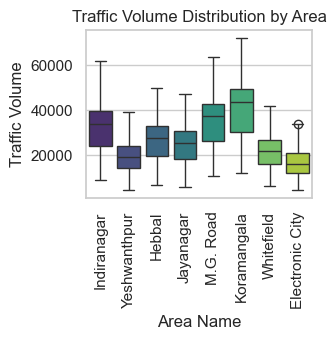

In [58]:
# 1. Traffic Volume by Area
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Area Name', y='Traffic Volume', hue = 'Area Name', palette='viridis', legend = False)
plt.title("Traffic Volume Distribution by Area")
plt.xticks(rotation=90)

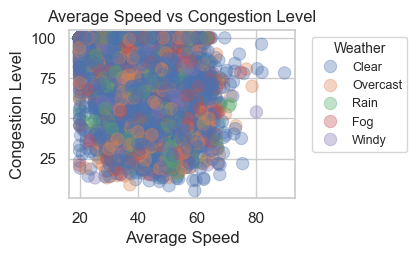

In [59]:
# Speed v/s Congestion Level

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Average Speed', y='Congestion Level', hue='Weather Conditions', alpha=0.35, edgecolor = None, s=80)
plt.title("Average Speed vs Congestion Level", fontsize=12)
plt.xlabel('Average Speed')
plt.ylabel('Congestion Level')

plt.legend(
    title="Weather",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize = 9,
    title_fontsize=10
)

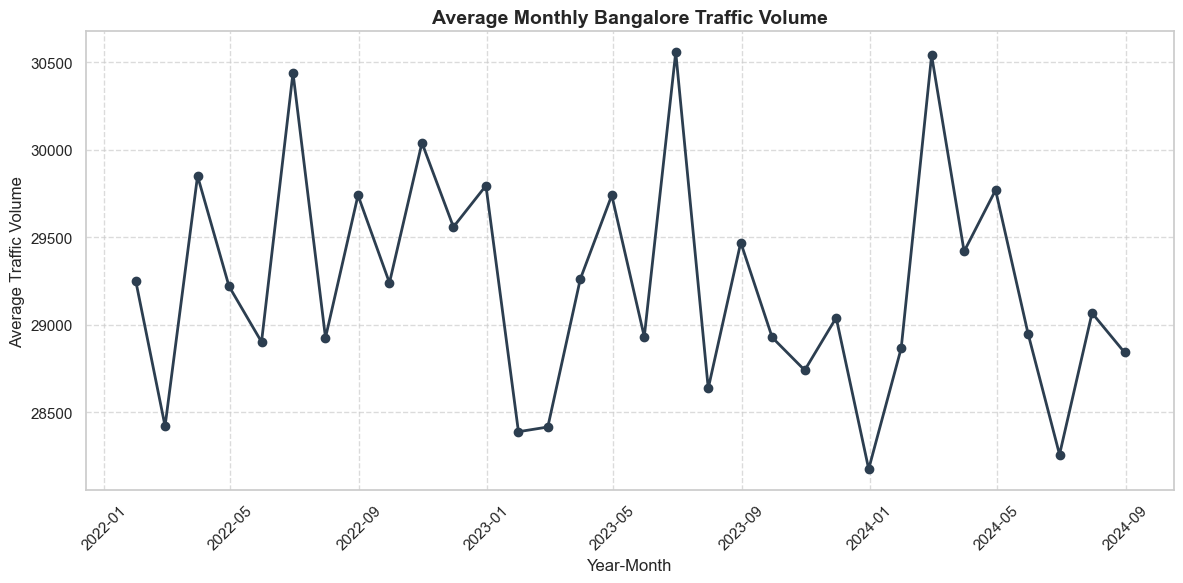

In [60]:
# Traffic trends over time

df['Date'] = pd.to_datetime(df['Date'])

# 2. Resample and Aggregate
# We use .resample() and then .mean().
# Note: 'ME' (Month End) is the updated frequency string for newer pandas versions.
monthly_traffic = df.resample('ME', on='Date')['Traffic Volume'].mean()

# 3. Visualization
plt.figure(figsize=(12, 6))
plt.plot(monthly_traffic.index, monthly_traffic.values,
         marker='o', linestyle='-', color='#2c3e50', linewidth=2)

# Adding labels and titles
plt.title('Average Monthly Bangalore Traffic Volume', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Traffic Volume', fontsize=12)

# 4. Refinement: Improve date formatting on the x-axis
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.tight_layout()
plt.show()

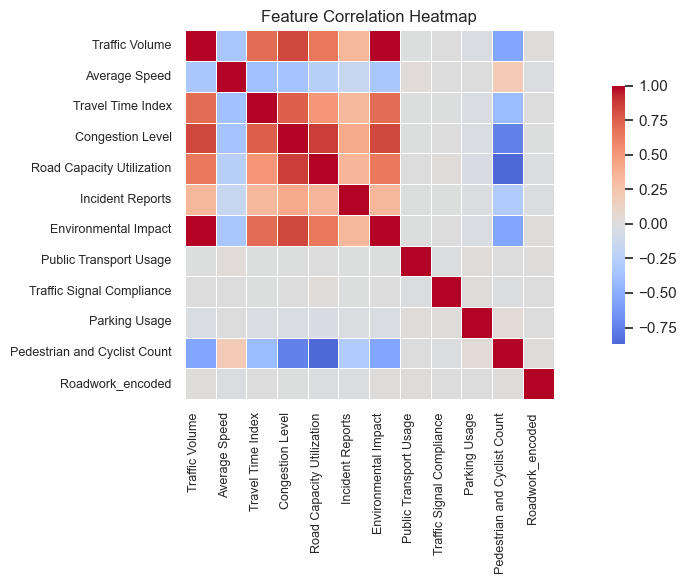

In [61]:
plt.figure(figsize=(12, 6))

numeric_cols = df.select_dtypes(include = [np.number]).columns
corr = df[numeric_cols].corr()

sns.heatmap(corr, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.7}, annot=False)

plt.title('Feature Correlation Heatmap', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()


Null values per column:
 Series([], dtype: int64)


C:\Users\SANJANA MUNDEWADI\AppData\Local\Temp\ipykernel_7420\1139662505.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

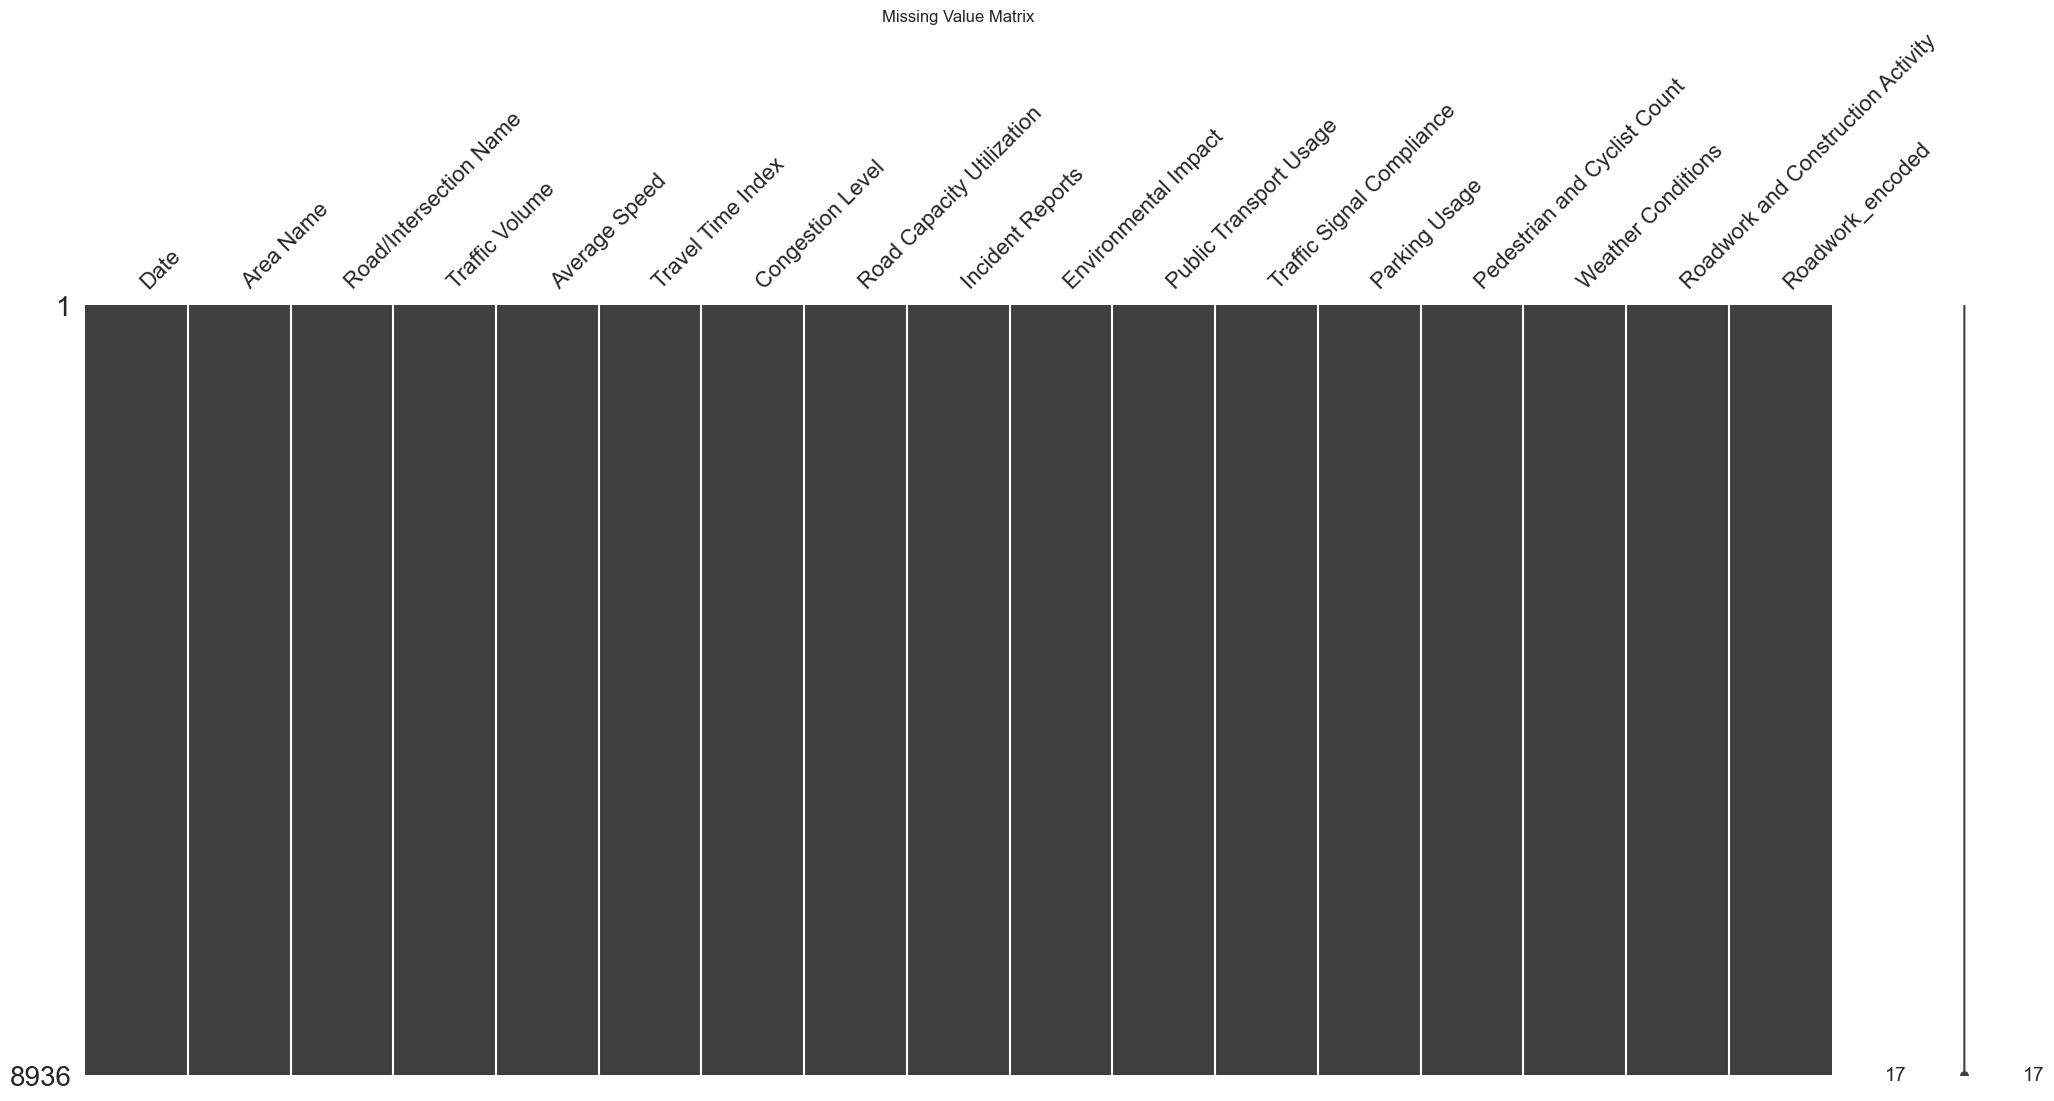

In [62]:
# Mssing Values Visualisation (if any)
import missingno as msno
import matplotlib.pyplot as plt

null_counts = df.isnull().sum()

print("Null values per column:\n", null_counts[null_counts > 0])

# Visualising missing values pattern
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title("Missing Value Matrix")
plt.savefig('outputs/')
plt.tight_layout()
plt.show()

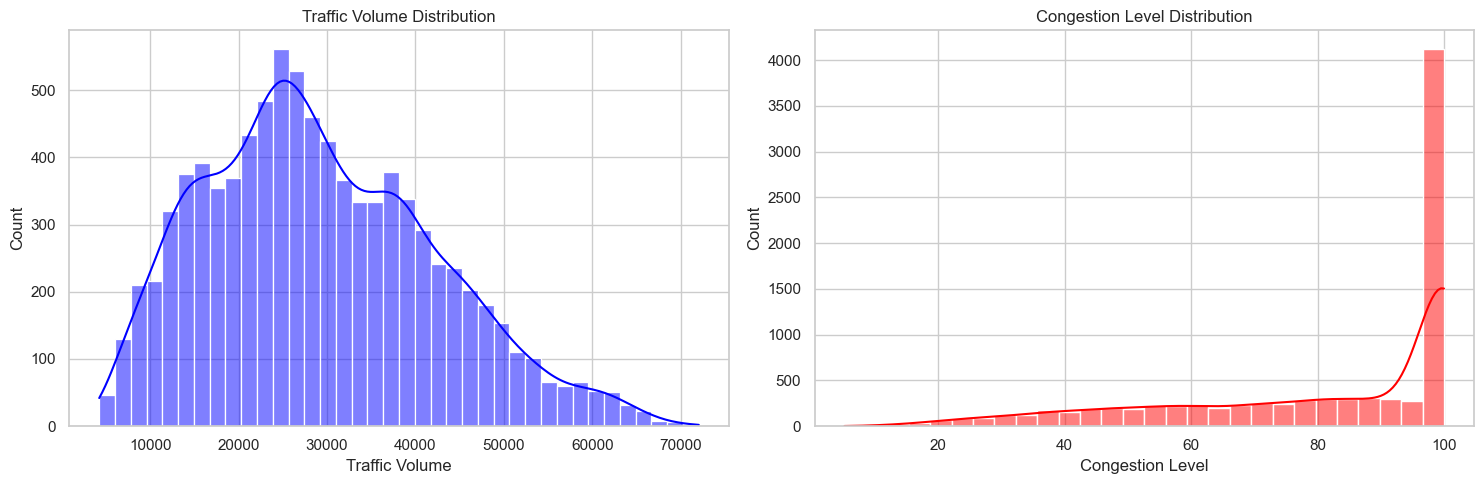

In [63]:
# Distribution plots for targets

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Traffic Volume Distribution
sns.histplot(df['Traffic Volume'], kde=True, ax=axes[0], color="blue")
axes[0].set_title("Traffic Volume Distribution")

# Congeston Level Distribution
sns.histplot(df['Congestion Level'], kde=True, ax=axes[1], color="red")
axes[1].set_title("Congestion Level Distribution")

plt.savefig('outputs/')
plt.tight_layout()
plt.show()

In [64]:
# Time based Trend Sanity Checks

df = df.sort_values('Date')
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max())
missing_dates = date_range.difference(df['Date'])

if(len(missing_dates) == 0):
    print("Sanity Check passed: No missing dates found")
else:
    print(f"Sanity Check failed: {len(missing_dates)} missing dates")

Sanity Check passed: No missing dates found


FEATURE ENGINEERING

In [65]:
# Let us start with the feature engineering

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

df_fe = df.copy()

# 1. Cyclic Temporal Features
# Day of week and Month are cyclic (e.g., Sunday is close to Monday).
# We use Sine/Cosine transforms so the model understands this circularity.

df_fe['Date'] = pd.to_datetime(df_fe['Date'])
df_fe['month'] = df_fe['Date'].dt.month
df_fe['day_of_week'] = df_fe['Date'].dt.dayofweek

df_fe['month_sin'] = np.sin(2 * np.pi * df_fe['month'] / 12)
df_fe['month_cos'] = np.cos(2 * np.pi * df_fe['month'] / 12)
df_fe['day_sin'] = np.sin(2 * np.pi * df_fe['day_of_week'] / 7)
df_fe['day_cos'] = np.cos(2 * np.pi * df_fe['day_of_week'] / 7)

In [66]:
print(df_fe)

           Date        Area Name Road/Intersection Name  Traffic Volume  \
0    2022-01-01      Indiranagar          100 Feet Road           50590   
5    2022-01-01        M.G. Road         Trinity Circle           47848   
1    2022-01-01      Indiranagar               CMH Road           30825   
2    2022-01-01       Whitefield    Marathahalli Bridge            7399   
4    2022-01-01      Koramangala          Sarjapur Road           57292   
...         ...              ...                    ...             ...   
8929 2024-08-09      Koramangala    Sony World Junction           27673   
8930 2024-08-09      Koramangala          Sarjapur Road           58992   
8931 2024-08-09  Electronic City             Hosur Road           11387   
8932 2024-08-09        M.G. Road         Trinity Circle           36477   
8935 2024-08-09     Yeshwanthpur    Yeshwanthpur Circle           14705   

      Average Speed  Travel Time Index  Congestion Level  \
0         50.230299           1.500000 

In [67]:
# Weekend Flag
df_fe['is_weekend'] = df_fe['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [68]:
# 2. Target Transfromations and Saturation Flags

# Log Transform for the Traffic Volume to handle the right-skew
df_fe['Log_Traffic_Volume'] = np.log1p(df_fe['Traffic Volume'])

# Binary Flag for the 100 % congestion "Spike"
df_fe['is_saturated'] = (df_fe['Congestion Level'] >= 99.9).astype(int)

In [69]:
print(df_fe)

           Date        Area Name Road/Intersection Name  Traffic Volume  \
0    2022-01-01      Indiranagar          100 Feet Road           50590   
5    2022-01-01        M.G. Road         Trinity Circle           47848   
1    2022-01-01      Indiranagar               CMH Road           30825   
2    2022-01-01       Whitefield    Marathahalli Bridge            7399   
4    2022-01-01      Koramangala          Sarjapur Road           57292   
...         ...              ...                    ...             ...   
8929 2024-08-09      Koramangala    Sony World Junction           27673   
8930 2024-08-09      Koramangala          Sarjapur Road           58992   
8931 2024-08-09  Electronic City             Hosur Road           11387   
8932 2024-08-09        M.G. Road         Trinity Circle           36477   
8935 2024-08-09     Yeshwanthpur    Yeshwanthpur Circle           14705   

      Average Speed  Travel Time Index  Congestion Level  \
0         50.230299           1.500000 

In [70]:
# 3. Categorical Encoding
# Weather: One-Hot encoding (Low Cardinality)

df_fe = pd.get_dummies(df_fe, columns=['Weather Conditions'], prefix='weather')

# Area & Road: Label Encoding
# (In a larger dataset, Target Encoding is better, but Label Encoding is safer for a start)
le_area = LabelEncoder()
le_road = LabelEncoder()

df_fe['Area ID'] = le_area.fit_transform(df_fe['Area Name'])
df_fe['Road_ID'] = le_road.fit_transform(df_fe['Road/Intersection Name'])

In [71]:
print(df_fe)

           Date        Area Name Road/Intersection Name  Traffic Volume  \
0    2022-01-01      Indiranagar          100 Feet Road           50590   
5    2022-01-01        M.G. Road         Trinity Circle           47848   
1    2022-01-01      Indiranagar               CMH Road           30825   
2    2022-01-01       Whitefield    Marathahalli Bridge            7399   
4    2022-01-01      Koramangala          Sarjapur Road           57292   
...         ...              ...                    ...             ...   
8929 2024-08-09      Koramangala    Sony World Junction           27673   
8930 2024-08-09      Koramangala          Sarjapur Road           58992   
8931 2024-08-09  Electronic City             Hosur Road           11387   
8932 2024-08-09        M.G. Road         Trinity Circle           36477   
8935 2024-08-09     Yeshwanthpur    Yeshwanthpur Circle           14705   

      Average Speed  Travel Time Index  Congestion Level  \
0         50.230299           1.500000 

In [72]:
# ---4.Interaction Features
# Weather and Incidents often have a myltiplier effect on Travel Time

df_fe['weather_incident_impact'] = df_fe['Incident Reports'] * (1 - df_fe['weather_Clear'] if 'weather_Clear' in df_fe.columns else 1)

In [73]:
# 5. Data leakage Prevention and Dropping
# Remove Columns that are:
# a) High-correlation proxies (Environmental Impact)
# b) Original strings/dates
# c) raw targets (if we are using the Log/Flag versions)
cols_to_drop = [
    'Date', 'Area Name', 'Road/Intersection Name',
    'Roadwork and Construction Activity', 'Environmental Impact',
    'month'
]
df_fe.drop(columns=cols_to_drop)


,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,...,Log_Traffic_Volume,is_saturated,weather_Clear,weather_Fog,weather_Overcast,weather_Rain,weather_Windy,Area ID,Road_ID,weather_incident_impact
0,50590,50.230299,1.500000,100.000000,100.000000,0,70.632330,84.044600,85.403629,111,...,10.831529,1,True,False,False,False,False,2,0,0
5,47848,34.241963,1.500000,100.000000,100.000000,3,39.927871,61.016765,55.394571,94,...,10.775805,1,False,False,True,False,False,5,13,3
1,30825,29.377125,1.500000,100.000000,100.000000,1,41.924899,91.407038,59.983689,100,...,10.336114,1,True,False,False,False,False,2,3,0
2,7399,54.474398,1.039069,28.347994,36.396525,0,44.662384,61.375541,95.466020,189,...,8.909235,0,True,False,False,False,False,6,8,0
4,57292,41.116763,1.500000,100.000000,100.000000,3,35.092601,64.634762,93.155171,104,...,10.955934,1,True,False,False,False,False,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8929,27673,20.000000,1.500000,93.969031,100.000000,0,57.726520,88.795917,83.965889,96,...,10.228249,0,False,False,True,False,False,4,11,0
8930,58992,43.138451,1.500000,100.000000,100.000000,2,68.810804,69.859257,64.179922,101,...,10.985174,1,True,False,False,False,False,4,9,0
8931,11387,23.440276,1.262384,35.871483,57.354487,1,21.523289,83.530352,97.898279,211,...,9.340315,0,False,True,False,False,False,0,5,1
8932,36477,45.168429,1.500000,100.000000,100.000000,3,29.822312,60.738488,60.355967,95,...,10.504465,1,True,False,False,False,False,5,13,0


In [74]:
# --- 6. FEATURE SCALING ---
# We scale numerical features to help the model weights converge.
# Note: In a real pipeline, you fit the scaler ONLY on training data.
# For now, we apply it to the dataframe.

num_features = [
    'Average Speed', 'Travel Time Index', 'Road Capacity Utilization', 'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage', 'Pedestrian and Cyclist Count', 'Incident Reports', 'weather_incident_impact'
]

scaler = StandardScaler()
df_fe[num_features] = scaler.fit_transform(df_fe[num_features])

In [75]:
print(df_fe)
df_fe.to_csv('data/processed/traffic_ml_ready.csv', index=False)

           Date        Area Name Road/Intersection Name  Traffic Volume  \
0    2022-01-01      Indiranagar          100 Feet Road           50590   
5    2022-01-01        M.G. Road         Trinity Circle           47848   
1    2022-01-01      Indiranagar               CMH Road           30825   
2    2022-01-01       Whitefield    Marathahalli Bridge            7399   
4    2022-01-01      Koramangala          Sarjapur Road           57292   
...         ...              ...                    ...             ...   
8929 2024-08-09      Koramangala    Sony World Junction           27673   
8930 2024-08-09      Koramangala          Sarjapur Road           58992   
8931 2024-08-09  Electronic City             Hosur Road           11387   
8932 2024-08-09        M.G. Road         Trinity Circle           36477   
8935 2024-08-09     Yeshwanthpur    Yeshwanthpur Circle           14705   

      Average Speed  Travel Time Index  Congestion Level  \
0          1.007120           0.752807 

Model Training

In [76]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Load the processed data from Phase 2
df = pd.read_csv('data/processed/traffic_ml_read.csv')

# 1. Time-Series Split
# We assume you have a 'Year' column or can derive it from the index.
# If you dropped the Date column in Phase 2, we use the row count
# (first ~66% for train, last ~33% for test for a 3-year span).

# --- STEP 1: FIXING THE FEATURES ---

# 1. Identify all non-numeric columns currently in your dataframe
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"Dropping non-numeric columns: {non_numeric_cols}")

# 2. Define your target columns
targets = ['Log_Traffic_Volume', 'Congestion Level', 'Traffic Volume', 'is_saturated']

# 3. Create the features list by taking columns that are NOT targets AND NOT strings
features = [col for col in df.columns if col not in targets and col not in non_numeric_cols]

train_size = int(len(df) * 0.66)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]


X_train = train_df[features]
X_test = test_df[features]

print(f"Features being used: {features}")
print(X_train.head()) # Check if any dates are still visible here

Dropping non-numeric columns: ['Date', 'Area Name', 'Road/Intersection Name', 'Roadwork and Construction Activity', 'weather_Clear', 'weather_Fog', 'weather_Overcast', 'weather_Rain', 'weather_Windy']
Features being used: ['Average Speed', 'Travel Time Index', 'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact', 'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage', 'Pedestrian and Cyclist Count', 'Roadwork_encoded', 'month', 'day_of_week', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'is_weekend', 'Area ID', 'Road_ID', 'weather_incident_impact']
   Average Speed  Travel Time Index  Road Capacity Utilization  \
0       1.007120           0.752807                   0.480677   
1      -0.486190           0.752807                   0.480677   
2      -0.940566           0.752807                   0.480677   
3       1.403518          -2.035479                  -3.354921   
4       0.155916           0.752807                   0.480677   

   Inciden

In [77]:
# 2. Model for Traffic Volume
y_train_vol = train_df['Log_Traffic_Volume']
y_test_vol = test_df['Log_Traffic_Volume']

model_vol = LinearRegression()
model_vol.fit(X_train, y_train_vol)
preds_vol = model_vol.predict(X_test)

# Convert Log back to actual Volume for human-readable error
actual_preds_vol = np.expm1(preds_vol)
actual_y_test_vol = np.expm1(y_test_vol)

In [78]:
# 3. Model for Congestion Level

y_train_cong = train_df['Congestion Level']
y_test_cong = test_df['Congestion Level']

model_cong = LinearRegression()
model_cong.fit(X_train, y_train_cong)
preds_cong = model_cong.predict(X_test)

In [79]:
# 4. Evaluation

def evaluate(actual, predicted, name):
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    print(f"--- {name} Baseline metrics")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (Accuracy Trend): {r2:.2f}\n")

evaluate(actual_y_test_vol, actual_preds_vol, 'Traffic Volume')
evaluate(y_test_cong, preds_cong, 'Congestion Level')

--- Traffic Volume Baseline metrics
Mean Absolute Error (MAE): 930.37
R-squared (Accuracy Trend): 0.99

--- Congestion Level Baseline metrics
Mean Absolute Error (MAE): 5.35
R-squared (Accuracy Trend): 0.92



In [80]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# --- STEP 1: RANDOM FOREST FOR TRAFFIC VOLUME ---
# n_estimators=100 means we use 100 trees.
# random_state ensures you get the same result every time.
rf_vol = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_vol.fit(X_train, y_train_vol)

# Predictions and Inverse Log
rf_preds_vol_log = rf_vol.predict(X_test)
rf_preds_vol = np.expm1(rf_preds_vol_log)


In [81]:
# --- STEP 2: RANDOM FOREST FOR CONGESTION LEVEL ---
rf_cong = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_cong.fit(X_train, y_train_cong)
rf_preds_cong = rf_cong.predict(X_test)

In [82]:
# --- STEP 3: EVALUATION ---
print("--- Traffic Volume: Random Forest ---")
evaluate(actual_y_test_vol, rf_preds_vol, "RF Traffic Volume")

print("--- Congestion Level: Random Forest ---")
evaluate(y_test_cong, rf_preds_cong, "RF Congestion Level")

--- Traffic Volume: Random Forest ---
--- RF Traffic Volume Baseline metrics
Mean Absolute Error (MAE): 8.63
R-squared (Accuracy Trend): 1.00

--- Congestion Level: Random Forest ---
--- RF Congestion Level Baseline metrics
Mean Absolute Error (MAE): 2.88
R-squared (Accuracy Trend): 0.97



In [83]:
# Get Feature Importance for Congestion
importances = rf_cong.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 5 Factors Driving Congestion in your Model:")
print(feature_importance_df.head(5))


Top 5 Factors Driving Congestion in your Model:
                        Feature  Importance
4          Environmental Impact    0.959550
2     Road Capacity Utilization    0.010601
8  Pedestrian and Cyclist Count    0.004407
0                 Average Speed    0.003267
5        Public Transport Usage    0.003119


In [84]:
# --- STEP 1: DEFINE HONEST PREDICTIVE FEATURES ---
# We keep only what we would know in a forecast scenario.
predictive_features = [
    'month_sin', 'month_cos', 'day_sin', 'day_cos', 'is_weekend',
    'Area ID', 'Road_ID', 'Roadwork_encoded', 'weather_incident_impact'
]

# Add the one-hot encoded weather columns (e.g., weather_Clear, weather_Rain)
weather_cols = [col for col in df.columns if col.startswith('weather_') and col != 'weather_incident_impact']
predictive_features.extend(weather_cols)

print(f"New Feature Count: {len(predictive_features)}")
print(f"Features: {predictive_features}")

# Filter X_train and X_test
X_train_honest = train_df[predictive_features]
X_test_honest = test_df[predictive_features]

New Feature Count: 14
Features: ['month_sin', 'month_cos', 'day_sin', 'day_cos', 'is_weekend', 'Area ID', 'Road_ID', 'Roadwork_encoded', 'weather_incident_impact', 'weather_Clear', 'weather_Fog', 'weather_Overcast', 'weather_Rain', 'weather_Windy']


In [85]:
from sklearn.ensemble import RandomForestRegressor

# --- TRAFFIC VOLUME (HONEST) ---
rf_vol_honest = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_vol_honest.fit(X_train_honest, y_train_vol)

preds_vol_log_honest = rf_vol_honest.predict(X_test_honest)
actual_preds_vol_honest = np.expm1(preds_vol_log_honest)

# --- CONGESTION LEVEL (HONEST) ---
rf_cong_honest = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_cong_honest.fit(X_train_honest, y_train_cong)
preds_cong_honest = rf_cong_honest.predict(X_test_honest)

# --- EVALUATION ---
print("--- HONEST Traffic Volume Metrics (No Leakage) ---")
evaluate(actual_y_test_vol, actual_preds_vol_honest, "Honest Volume")

print("--- HONEST Congestion Level Metrics (No Leakage) ---")
evaluate(y_test_cong, preds_cong_honest, "Honest Congestion")

--- HONEST Traffic Volume Metrics (No Leakage) ---
--- Honest Volume Baseline metrics
Mean Absolute Error (MAE): 9289.25
R-squared (Accuracy Trend): 0.14

--- HONEST Congestion Level Metrics (No Leakage) ---
--- Honest Congestion Baseline metrics
Mean Absolute Error (MAE): 16.58
R-squared (Accuracy Trend): 0.11



In [86]:
importances_honest = rf_cong_honest.feature_importances_
importance_df_honest = pd.DataFrame({'Feature': predictive_features, 'Importance': importances_honest})
print(importance_df_honest.sort_values(by='Importance', ascending=False).head(5))

     Feature  Importance
5    Area ID    0.307147
0  month_sin    0.115995
1  month_cos    0.113514
2    day_sin    0.103128
6    Road_ID    0.083292


Training XGBoost for Traffic Volume...
Training XGBoost for Congestion Level...

--- XGBoost + Memory (Lag) Results ---
--- XGB Volume Baseline metrics
Mean Absolute Error (MAE): 12624.78
R-squared (Accuracy Trend): -0.59

--- XGB Congestion Baseline metrics
Mean Absolute Error (MAE): 22.50
R-squared (Accuracy Trend): -0.46



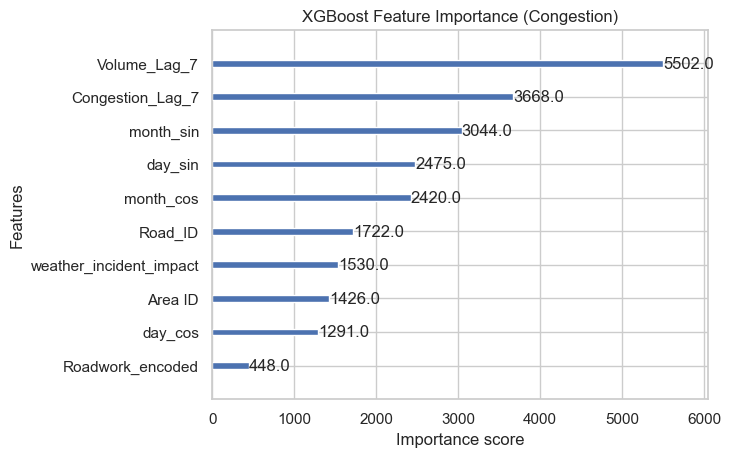

In [87]:
import xgboost as xgb
from xgboost import plot_importance

# --- STEP 1: ADDING MEMORY (LAG FEATURES) ---
# We need to sort by Area and Date to ensure the shift happens correctly for each road.
df_lag = df.copy()
df_lag['Date'] = pd.to_datetime(df['Date']) # Ensure Date is datetime
df_lag = df_lag.sort_values(by=['Area ID', 'Road_ID', 'Date'])

# Create a "7-Day Lag" (What was the traffic on this road exactly 7 days ago?)
# Note: This reduces our dataset size slightly because the first 7 days won't have a "past" to look at.
df_lag['Volume_Lag_7'] = df_lag.groupby(['Area ID', 'Road_ID'])['Log_Traffic_Volume'].shift(7)
df_lag['Congestion_Lag_7'] = df_lag.groupby(['Area ID', 'Road_ID'])['Congestion Level'].shift(7)

# Drop the rows where Lag is NaN (the first week of data)
df_lag = df_lag.dropna()

# --- STEP 2: PREPARE DATA FOR XGBOOST ---
# Update our feature list to include the Lags
xgb_features = predictive_features + ['Volume_Lag_7', 'Congestion_Lag_7']

# Re-split data (Train/Test)
train_size = int(len(df_lag) * 0.70) # 70% Train, 30% Test
train_df_xgb = df_lag.iloc[:train_size]
test_df_xgb = df_lag.iloc[train_size:]

X_train_xgb = train_df_xgb[xgb_features]
y_train_vol_xgb = train_df_xgb['Log_Traffic_Volume']
y_train_cong_xgb = train_df_xgb['Congestion Level']

X_test_xgb = test_df_xgb[xgb_features]
y_test_vol_xgb = test_df_xgb['Log_Traffic_Volume']
y_test_cong_xgb = test_df_xgb['Congestion Level']

# --- STEP 3: TRAIN XGBOOST (The Industry Standard) ---
print("Training XGBoost for Traffic Volume...")
reg_vol = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)
reg_vol.fit(X_train_xgb, y_train_vol_xgb)
preds_vol_log_xgb = reg_vol.predict(X_test_xgb)
actual_preds_vol_xgb = np.expm1(preds_vol_log_xgb)
actual_y_test_vol_xgb = np.expm1(y_test_vol_xgb)

print("Training XGBoost for Congestion Level...")
reg_cong = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)
reg_cong.fit(X_train_xgb, y_train_cong_xgb)
preds_cong_xgb = reg_cong.predict(X_test_xgb)

# --- STEP 4: EVALUATION ---
print("\n--- XGBoost + Memory (Lag) Results ---")
evaluate(actual_y_test_vol_xgb, actual_preds_vol_xgb, "XGB Volume")
evaluate(y_test_cong_xgb, preds_cong_xgb, "XGB Congestion")

# --- STEP 5: WHAT DRIVES THE MODEL? ---
# Let's see if the "Lag" (History) is now the most important feature
xgb.plot_importance(reg_cong, max_num_features=10)
plt.title("XGBoost Feature Importance (Congestion)")
plt.show()

In [88]:
# --- STEP 1: CORRECT DATA SPLITTING STRATEGY ---
# Ensure Date is in datetime format
df_lag['Date'] = pd.to_datetime(df_lag['Date'])

# Define the "Cutoff Date" for training vs testing
cutoff_date = pd.to_datetime('2024-01-01')

# Split based on TIME, not Index
train_df_xgb = df_lag[df_lag['Date'] < cutoff_date].copy()
test_df_xgb = df_lag[df_lag['Date'] >= cutoff_date].copy()

print(f"Training Range: {train_df_xgb['Date'].min().date()} to {train_df_xgb['Date'].max().date()}")
print(f"Testing Range:  {test_df_xgb['Date'].min().date()} to {test_df_xgb['Date'].max().date()}")
print(f"Training Samples: {len(train_df_xgb)}, Testing Samples: {len(test_df_xgb)}")

# --- STEP 2: DEFINE FEATURES ---
# Ensure we use the exact same features as before
# Note: 'Roadwork' might be named 'Roadwork_encoded' depending on your Phase 1 code.
# We use the list we defined earlier.
xgb_features = predictive_features + ['Volume_Lag_7', 'Congestion_Lag_7']

X_train_xgb = train_df_xgb[xgb_features]
y_train_vol_xgb = train_df_xgb['Log_Traffic_Volume']
y_train_cong_xgb = train_df_xgb['Congestion Level']

X_test_xgb = test_df_xgb[xgb_features]
y_test_vol_xgb = test_df_xgb['Log_Traffic_Volume']
y_test_cong_xgb = test_df_xgb['Congestion Level']

# --- STEP 3: RETRAIN XGBOOST ---
print("\nRetraining XGBoost with Correct Split...")

# Model for Volume
reg_vol = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42, n_jobs=-1)
reg_vol.fit(X_train_xgb, y_train_vol_xgb)

# Model for Congestion
reg_cong = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42, n_jobs=-1)
reg_cong.fit(X_train_xgb, y_train_cong_xgb)

# Predictions
preds_vol_log_xgb = reg_vol.predict(X_test_xgb)
actual_preds_vol_xgb = np.expm1(preds_vol_log_xgb)
actual_y_test_vol_xgb = np.expm1(y_test_vol_xgb)

preds_cong_xgb = reg_cong.predict(X_test_xgb)

# --- STEP 4: EVALUATION ---
print("\n--- Corrected XGBoost Results ---")
evaluate(actual_y_test_vol_xgb, actual_preds_vol_xgb, "XGB Volume")
evaluate(y_test_cong_xgb, preds_cong_xgb, "XGB Congestion")

Training Range: 2022-01-08 to 2023-12-31
Testing Range:  2024-01-01 to 2024-08-09
Training Samples: 6725, Testing Samples: 2099

Retraining XGBoost with Correct Split...

--- Corrected XGBoost Results ---
--- XGB Volume Baseline metrics
Mean Absolute Error (MAE): 8961.30
R-squared (Accuracy Trend): 0.23

--- XGB Congestion Baseline metrics
Mean Absolute Error (MAE): 15.91
R-squared (Accuracy Trend): 0.22



Starting Hyperparameter Tuning (this may take a minute)...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters Found: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}

--- TUNED XGBoost Congestion Results ---
--- Tuned XGB Congestion Baseline metrics
Mean Absolute Error (MAE): 15.48
R-squared (Accuracy Trend): 0.29



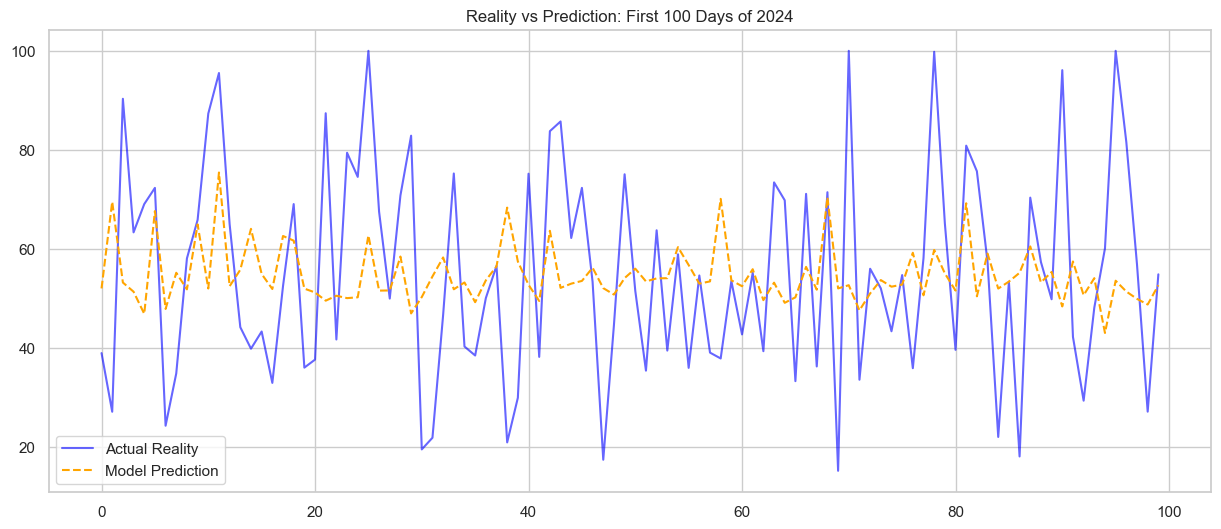

In [89]:
from sklearn.model_selection import RandomizedSearchCV

# --- STEP 1: DEFINE THE PARAMETER GRID ---
# These are the "knobs" we can twist in XGBoost
param_grid = {
    'n_estimators': [100, 300, 500, 1000],        # Number of trees
    'max_depth': [3, 5, 7, 10],                   # How deep each tree can grow
    'learning_rate': [0.01, 0.05, 0.1, 0.2],      # How fast the model learns
    'subsample': [0.6, 0.8, 1.0],                 # Fraction of data to use per tree
    'colsample_bytree': [0.6, 0.8, 1.0]           # Fraction of features to use per tree
}

# --- STEP 2: SETUP THE SEARCH (Target: Congestion) ---
# We focus on Congestion Level as it's the main app feature
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,              # Try 20 different random combinations
    scoring='neg_mean_absolute_error', # Optimize for lowest Error
    cv=3,                   # 3-Fold Cross Validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print("Starting Hyperparameter Tuning (this may take a minute)...")
random_search.fit(X_train_xgb, y_train_cong_xgb)

# --- STEP 3: GET THE BEST MODEL ---
best_params = random_search.best_params_
print(f"\nBest Parameters Found: {best_params}")

best_model = random_search.best_estimator_
tuned_preds = best_model.predict(X_test_xgb)

# --- STEP 4: FINAL EVALUATION ---
print("\n--- TUNED XGBoost Congestion Results ---")
evaluate(y_test_cong_xgb, tuned_preds, "Tuned XGB Congestion")

# --- STEP 5: VISUALIZE PREDICTIONS VS ACTUALS ---
# This plot is what you show stakeholders/users
plt.figure(figsize=(15, 6))
# Plot only the first 100 days of the test set to make it readable
plt.plot(y_test_cong_xgb.values[:100], label='Actual Reality', color='blue', alpha=0.6)
plt.plot(tuned_preds[:100], label='Model Prediction', color='orange', linestyle='--')
plt.title("Reality vs Prediction: First 100 Days of 2024")
plt.legend()
plt.show()

Starting Hyperparameter Tuning for TRAFFIC VOLUME...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters for Volume: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.6}

--- TUNED XGBoost Volume Results ---
--- Tuned XGB Volume Baseline metrics
Mean Absolute Error (MAE): 8648.18
R-squared (Accuracy Trend): 0.31



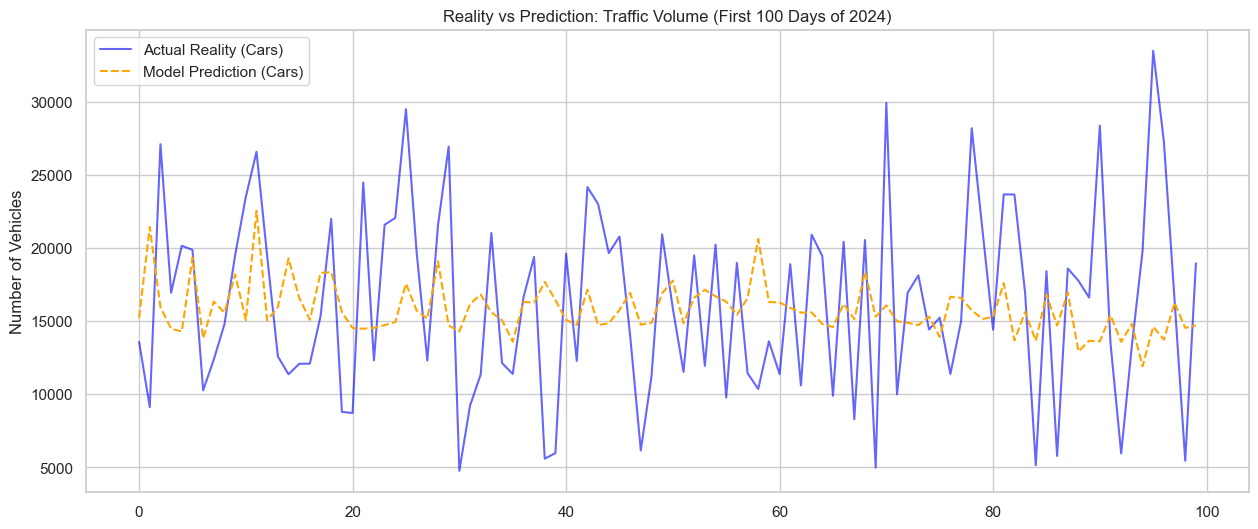

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)


In [90]:
# --- STEP 1: SETUP THE SEARCH (Target: Traffic Volume) ---
print("Starting Hyperparameter Tuning for TRAFFIC VOLUME...")

# We use the same parameter grid as before
xgb_model_vol = xgb.XGBRegressor(random_state=42, n_jobs=-1)

random_search_vol = RandomizedSearchCV(
    estimator=xgb_model_vol,
    param_distributions=param_grid, # Using the grid you defined previously
    n_iter=20,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit on the LOG transformed target
random_search_vol.fit(X_train_xgb, y_train_vol_xgb)

# --- STEP 2: GET THE BEST MODEL ---
best_params_vol = random_search_vol.best_params_
print(f"\nBest Parameters for Volume: {best_params_vol}")

best_model_vol = random_search_vol.best_estimator_

# Make predictions (These are still in LOG scale)
tuned_preds_log = best_model_vol.predict(X_test_xgb)

# --- STEP 3: INVERSE TRANSFORM (LOG -> REAL CARS) ---
tuned_preds_actual = np.expm1(tuned_preds_log)
y_test_actual_vol = np.expm1(y_test_vol_xgb)

# --- STEP 4: FINAL EVALUATION ---
print("\n--- TUNED XGBoost Volume Results ---")
evaluate(y_test_actual_vol, tuned_preds_actual, "Tuned XGB Volume")

# --- STEP 5: VISUALIZE PREDICTIONS VS ACTUALS ---
plt.figure(figsize=(15, 6))
plt.plot(y_test_actual_vol.values[:100], label='Actual Reality (Cars)', color='blue', alpha=0.6)
plt.plot(tuned_preds_actual[:100], label='Model Prediction (Cars)', color='orange', linestyle='--')
plt.title("Reality vs Prediction: Traffic Volume (First 100 Days of 2024)")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.show()

print(best_model_vol)

Artifacts saved as models

In [91]:
import joblib
import os

# Create the directory if it doesn't exist
save_dir = 'models/saved_models/'
os.makedirs(save_dir, exist_ok=True)

# --- 1. SAVE THE TUNED MODELS (THE BRAINS) ---

# Save the Traffic Volume Model (XGBoost)
print("Saving Traffic Volume Model...")
joblib.dump(best_model_vol, os.path.join(save_dir, 'xgb_volume_model.joblib'))

# Save the Congestion Level Model (XGBoost)
print("Saving Congestion Level Model...")
joblib.dump(best_model, os.path.join(save_dir, 'xgb_congestion_model.joblib'))

# --- 2. SAVE THE SCALER (THE TRANSLATOR) ---

# Save the StandardScaler
# (Critical: The app needs this to scale inputs like 'Lags' or 'Speed' exactly like the training data)
print("Saving Scaler...")
joblib.dump(scaler, os.path.join(save_dir, 'scaler.joblib'))

# --- 3. SAVE THE ENCODERS (THE DICTIONARY) ---

# Save the Area and Road Encoders
# (Critical: The app needs this to convert "Indiranagar" into the correct ID number)
print("Saving Label Encoders...")
joblib.dump(le_area, os.path.join(save_dir, 'le_area.joblib'))
joblib.dump(le_road, os.path.join(save_dir, 'le_road.joblib'))

print(f"\nSUCCESS: All 5 artifacts have been saved to '{save_dir}'.")
print("Your Machine Learning Pipeline is now serialized and ready for deployment.")

Saving Traffic Volume Model...
Saving Congestion Level Model...
Saving Scaler...
Saving Label Encoders...

SUCCESS: All 5 artifacts have been saved to 'models/saved_models/'.
Your Machine Learning Pipeline is now serialized and ready for deployment.


In [92]:
print(df_lag) # This is the new updated dataframe with lag features for previous 7 days for improving the accuracy of the traffic prediction.

           Date        Area Name Road/Intersection Name  Traffic Volume  \
391  2022-02-12  Electronic City             Hosur Road           21483   
407  2022-02-13  Electronic City             Hosur Road           29805   
416  2022-02-14  Electronic City             Hosur Road           18175   
441  2022-02-17  Electronic City             Hosur Road           17511   
476  2022-02-20  Electronic City             Hosur Road           16413   
...         ...              ...                    ...             ...   
8766 2024-07-23     Yeshwanthpur    Yeshwanthpur Circle           27122   
8805 2024-07-27     Yeshwanthpur    Yeshwanthpur Circle           19802   
8857 2024-08-01     Yeshwanthpur    Yeshwanthpur Circle           13685   
8903 2024-08-06     Yeshwanthpur    Yeshwanthpur Circle           12561   
8935 2024-08-09     Yeshwanthpur    Yeshwanthpur Circle           14705   

      Average Speed  Travel Time Index  Congestion Level  \
391        0.702367          -0.072297 

In [93]:
df_lag.to_csv('data/processed/traffic_ml_ready.csv', index=False)

In [94]:
df_lag.isna().sum()

Date                                  0
Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Roadwork and Construction Activity    0
Roadwork_encoded                      0
month                                 0
day_of_week                           0
month_sin                             0
month_cos                             0
day_sin                               0
day_cos                               0
is_weekend                            0
Log_Traffic_Volume                    0
is_saturated                          0
